<a href="https://colab.research.google.com/github/maferjmnz/LINEAS-DE-TIEMPO-2023/blob/main/pronostico_tipodecambio_A00832362_MFJV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo
## María Fernanda Jiménez Vázquez A00832362
### Sesión 8 - 10 de marzo del 2023

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [4]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

El prónostico de la serie lo vamos a realizar en varios pasos:
1. Graficar la serie
2. Realizar la prueba de raices unitarias para verificar que el proceso sea estacionario
3. Si el proceso no es estacionario, lo hacemos estacionario. Si ya es estacionario procedemos al siguiente paso
4. Identificar qué tipo de proceso estacionario es
5. Identificado el proceso, realizar el pronóstico de la serie

In [16]:
tipo_cambio = pd.read_csv("/content/drive/MyDrive/tipo_de_cambio.csv")

In [17]:
tipo_cambio

,Date,tipo_cambio
0,21/03/22,20.381149
1,22/03/22,20.381901
2,23/03/22,20.272200
3,24/03/22,20.226641
4,25/03/22,20.066299
...,...,...
250,06/03/23,17.978001
251,07/03/23,18.001350
252,08/03/23,18.100100
253,09/03/23,17.970751


In [18]:
tipo_cambio['Date'] = pd.to_datetime(tipo_cambio['Date'], format='%d/%m/%y')

In [21]:
tipo_cambio = tipo_cambio.set_index('Date')

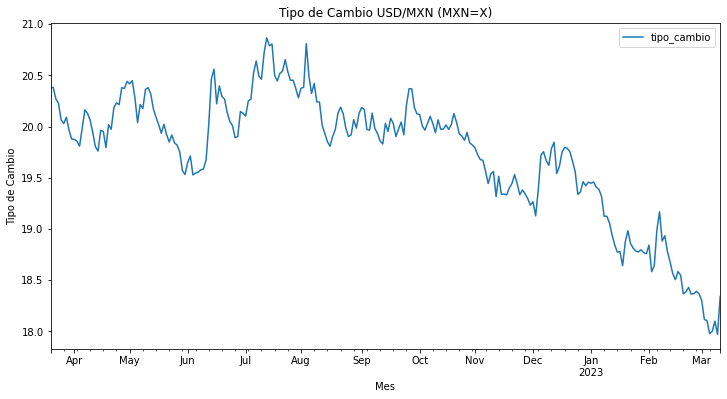

In [24]:
# comenzamos graficando la serie
# titulo y nombre a ejes
tipo_cambio.plot()
plt.title('Tipo de Cambio USD/MXN (MXN=X)')
plt.xlabel('Mes')
plt.ylabel('Tipo de Cambio')
plt.show()

In [25]:
## vamos a verificar que la serie sea estacionaria
result_adf = adfuller(tipo_cambio['tipo_cambio'])
print('p-value: %.2f' % result_adf[1])

p-value: 0.74


Recuerde que

𝐻0:  serie No estacionaria

𝐻𝑎:  serie estacionaria **texto en negrita**

regla de decisión si el p-valor$< \alpha $ entonces rechazar $H_0$


con un $\alpha=0.05$

*Conclusión: 0.74>0.05*

**No rechazamos H0, por lo cual la serie no es estacionaria.**

**¿Cómo diferenciar una serie?**

In [26]:
# diferenciar serie
# diferenciar es restar a cada valor de la serie su valor anterior 
tipo_cambio['tipo_diff'] = tipo_cambio['tipo_cambio'].diff()

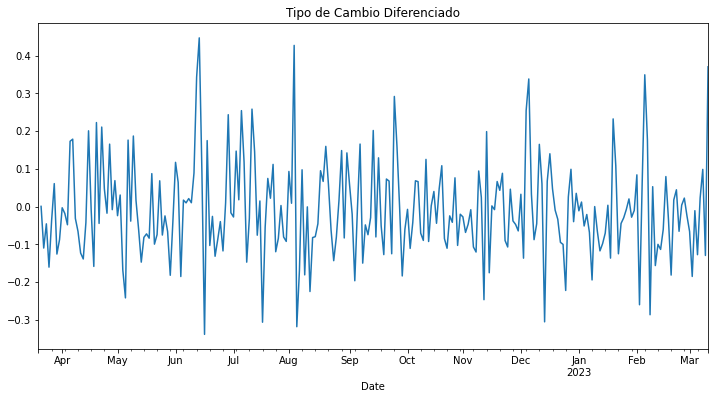

In [27]:
# graficamos esta nueva serie
tipo_cambio['tipo_diff'].plot()
plt.title('Tipo de Cambio Diferenciado')
plt.show()

Realizamos la prueba de raices unitaria

In [28]:
result_adf = adfuller(tipo_cambio['tipo_diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


Conclusión p value = 0.00 < 0.05, entonces rechazamos H0. Ahora la serie diferenciada es estacionaria.


Si la serie es estacionaria, tratamos de identificar que proceso es, para eso vamos a ver si gráfica de autocorrelación y autocorrelación parcial


Para determinar que tipo de proceso es, recurriremos a:


*   Función de autocorrelación ACF
*   Función de autocorrelación Parcial PACF



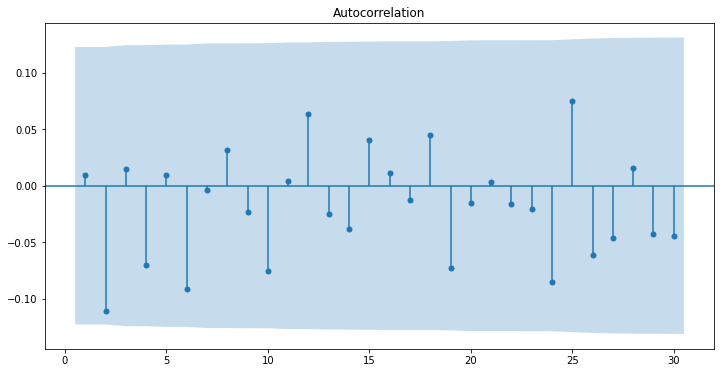

In [29]:
#plot_acf autocorrelación
plot_acf(tipo_cambio['tipo_diff'].dropna(), zero=False, lags=30);

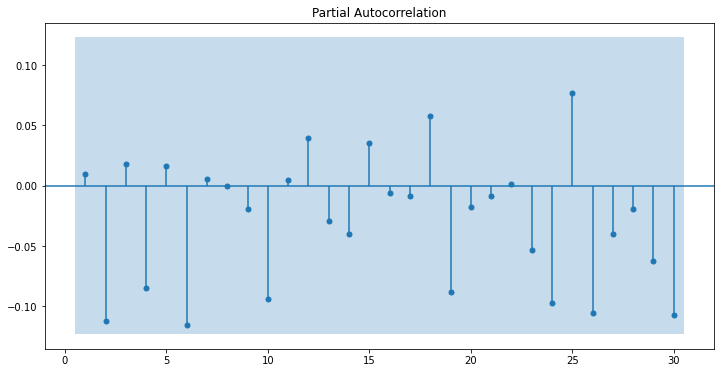

In [30]:
#autocorrelación parcial PACF
plot_pacf(tipo_cambio['tipo_diff'].dropna(), zero=False, lags=30);

Estimamos varios modelos para elegir el proceso

In [31]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(tipo_cambio['tipo_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 0, MA: 1
AR: 0, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

AR: 0, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 0, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 1, MA: 0
AR: 1, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

AR: 1, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 1, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 1, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, 

AR: 2, MA: 0
AR: 2, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 2, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 2, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, 

AR: 2, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 3, MA: 0
AR: 3, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 3, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization 

AR: 3, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 3, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 4, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelih

AR: 4, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


AR: 4, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0  -320.417436 -313.342768
   1  -318.450150 -307.838148
   2  -320.544245 -306.394908
   3  -318.734628 -301.047957
   4  -319.265943 -298.041938
1  0  -318.442638 -307.830635
   1  -320.676760 -306.527423
   2  -320.372637 -302.685965
   3  -318.605362 -297.381356
   4  -317.630640 -292.869301
2  0  -319.708778 -305.559441
   1  -320.213898 -302.527227
   2  -319.522004 -298.297998
   3  -319.825078 -295.063738
   4  -316.993609 -288.694934
3  0  -317.810102 -300.123431
   1  -318.399339 -297.175333
   2  -319.834166 -295.072827
   3  -318.079475 -289.780801
   4  -315.901653 -284.065645
4  0  -317.778004 -296.553998
   1  -317.295156 -292.533816
   2  -316.671270 -288.372596
   3  -315.812079 -283.976071
   4  -313.678495 -278.305153

Vamos a elegir el modelo que tiene el "mejor" criterio de Akaike (AIC), o sea el valor más pequeño

In [32]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
1  1  -320.676760 -306.527423
0  2  -320.544245 -306.394908
   0  -320.417436 -313.342768
1  2  -320.372637 -302.685965
2  1  -320.213898 -302.527227
3  2  -319.834166 -295.072827
2  3  -319.825078 -295.063738
   0  -319.708778 -305.559441
   2  -319.522004 -298.297998
0  4  -319.265943 -298.041938
   3  -318.734628 -301.047957
1  3  -318.605362 -297.381356
0  1  -318.450150 -307.838148
1  0  -318.442638 -307.830635
3  1  -318.399339 -297.175333
   3  -318.079475 -289.780801
   0  -317.810102 -300.123431
4  0  -317.778004 -296.553998
1  4  -317.630640 -292.869301
4  1  -317.295156 -292.533816
2  4  -316.993609 -288.694934
4  2  -316.671270 -288.372596
3  4  -315.901653 -284.065645
4  3  -315.812079 -283.976071
   4  -313.678495 -278.305153

El criterio de Akaike (AIC) y el criterio bayesanio de información (BIC) nos ayudan para elegir el modelo adecuado. Elegir solo uno, BIC o AIC.

Entre más grande es el AIC/BIC es un peor modelo, de acuerdo con el criterio de Akaike el mejor modelo es un ARMA(4,4)

Sabemos que el tipo de cambio solo lo diferenciamos una vez, por lo tanto es un ARIMA (1,1,1)

In [34]:
modelo = ARIMA (tipo_cambio['tipo_cambio'], order=(1, 1, 1)) ## ARIMA(1,1,1)
resultado = modelo.fit()  # calcula
print( resultado.summary() ) 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:            tipo_cambio   No. Observations:                  255
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 163.883
Date:                Fri, 10 Mar 2023   AIC                           -321.767
Time:                        14:06:30   BIC                           -311.155
Sample:                    03-21-2022   HQIC                          -317.498
                         - 03-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7789      0.147     -5.283      0.000      -1.068      -0.490
ma.L1          0.8628      0.131      6.605      0.000       0.607       1.119
sigma2         0.0161      0.001     13.935      0.0

In [42]:
#realizamos pronóstico
tipo_cambio['tipo_pronosticado'] = resultado.predict()

In [44]:
tipo_cambio.iloc[0]['tipo_pronosticado'] = tipo_cambio.iloc[0]['tipo_cambio']

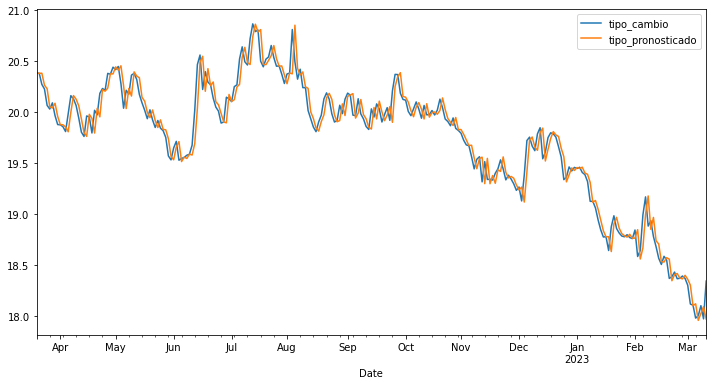

In [45]:
tipo_cambio[['tipo_cambio', 'tipo_pronosticado']].plot();

In [37]:
tipo_cambio.describe()

,tipo_cambio,tipo_diff,tipo_pronosticado
count,255.000000,254.000000,255.000000
mean,19.730705,-0.008030,19.658354
std,0.623297,0.128018,1.381863
min,17.970751,-0.338508,0.000000
25%,19.432105,-0.084462,19.422736
50%,19.908100,-0.024160,19.907088
75%,20.130930,0.063514,20.143451
max,20.866461,0.447340,20.863270


In [38]:
tipo_cambio.tail()

,tipo_cambio,tipo_diff,tipo_pronosticado
Date,,,
2023-03-06,17.978001,-0.127300,18.118686
2023-03-07,18.001350,0.023349,17.955773
2023-03-08,18.100100,0.098750,18.022487
2023-03-09,17.970751,-0.129349,18.090146
2023-03-10,18.341410,0.370659,17.968489


In [40]:
resultado.predict(253,260)

2023-03-09    18.090146
2023-03-10    17.968489
2023-03-13    18.374455
2023-03-14    18.348715
2023-03-15    18.368765
2023-03-16    18.353147
2023-03-17    18.365312
2023-03-20    18.355837
Freq: B, Name: predicted_mean, dtype: float64

El modelo pronostica que para el 10 de Marzo el tipo de cambio será de 17.96